In [1]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from scipy.stats import linregress

In [2]:
Sighting_data = pd.read_csv("../alcatraz-master/CSV_files/Airport_distance.csv")
Airport_data = pd.read_csv("../alcatraz-master/CSV_files/Airport-data.csv")

In [3]:
Airport_data.head()

,Unnamed: 0,AirportName,Number of Departures,Number of Connections,Year
0,0,WEBEQUIE,365,4,2018
1,1,BIG TROUT LAKE,863,6,2018
2,2,PICKLE LAKE,626,5,2018
3,3,MUSKRAT DAM,488,4,2018
4,4,KITCHENER,355,1,2018


In [5]:
Sighting_data = Sighting_data[Sighting_data.year > 2002]
Airport_data = Airport_data[Airport_data.Year < 2017]

In [6]:
yearly_sightings = Sighting_data.groupby('year').size().reset_index(name='counts')
yearly_sightings

,year,counts
0,2003,16
1,2004,21
2,2005,12
3,2006,15
4,2007,25
5,2008,11
6,2009,16
7,2010,24
8,2011,19
9,2012,32


In [26]:
yearly_Flights = Airport_data.groupby('Year').sum().reset_index()
yearly_Flights

,Year,Unnamed: 0,Number of Departures,Number of Connections
0,2003,484653,925062,2364
1,2004,444733,947011,2355
2,2005,450723,933070,2195
3,2006,410905,949246,2105
4,2007,379206,1025909,2264
5,2008,381125,1078821,2326
6,2009,356551,1018726,2346
7,2010,306530,1018464,2309
8,2011,277939,1025864,2321
9,2012,259261,1050597,2487


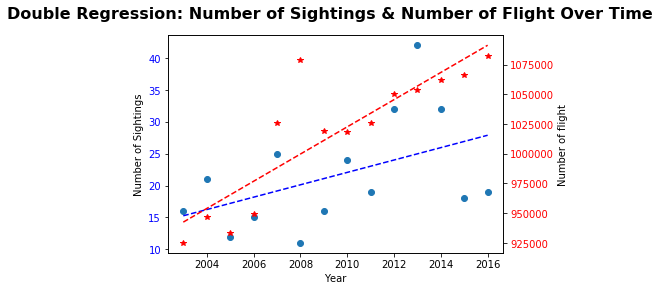

In [27]:
x_axis = yearly_sightings['year']
ys_axis=yearly_sightings['counts']
yf_axis=yearly_Flights['Number of Departures']

(slope, intercept, _, _, _) = linregress(x_axis, ys_axis)
fit = slope * x_axis + intercept


fig, axs = plt.subplots()

axs.plot(x_axis, ys_axis, linewidth=0, marker='o')
axs.plot(x_axis, fit, 'b--')
axs.tick_params(axis='y', labelcolor='b')


axf = axs.twinx()

(slope, intercept, _, _, _) = linregress(x_axis, yf_axis)
fit = slope * x_axis + intercept

axf.plot(x_axis, yf_axis, linewidth=0, marker='*', color='r')
axf.plot(x_axis, fit, 'r--')
axf.tick_params(axis='y', labelcolor='r')


fig.suptitle("Double Regression: Number of Sightings & Number of Flight Over Time", fontsize=16, fontweight="bold")


axs.set_xlabel("Year")
axs.set_ylabel("Number of Sightings")
axf.set_ylabel("Number of flight")




plt.show()